In [57]:
import pandas as pd
import numpy as np
import os
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

df = pd.read_csv("https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
                na_values=["NA", "?"])


df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

names = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
x = df[names].values
y = df["mpg"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [53]:
def report_coef(names, coef, intercept):
    r = pd.DataFrame({"coef": coef, "positive": coef>=0}, index = names)
    r = r.sort_values(by=["coef"])
    display(r)
    print(f"Intercept{intercept}")
    r["coef"].plot(kind="barh", color=r["positive"].map({True: "b", False: "r"}))

RMSE: 3.1672101675081494


,coef,positive
weight,-5.685631,False
cylinders,-0.609733,False
horsepower,-0.108172,False
acceleration,0.319560,True
origin,1.011911,True
displacement,1.486467,True
year,2.669842,True


Intercept23.578859060402685


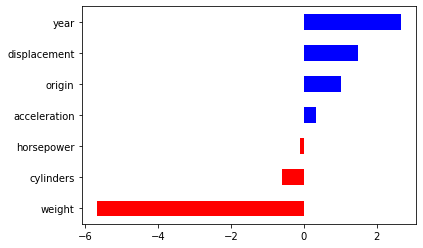

In [54]:
regressor = LinearRegression().fit(x_train, y_train)
pred = regressor.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"RMSE: {score}")
report_coef(names, regressor.coef_, regressor.intercept_)

RMSE: 3.180355739029003


,coef,positive
weight,-5.471619,False
cylinders,-0.378520,False
horsepower,-0.070741,False
acceleration,0.283471,True
origin,0.966159,True
displacement,0.967883,True
year,2.650179,True


Intercept23.578859060402685


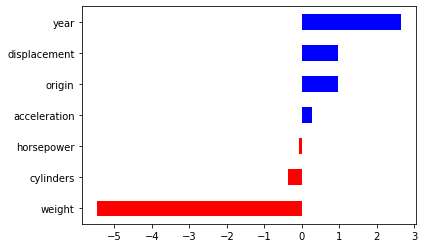

In [55]:
lasso = Lasso(random_state=0, alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"RMSE: {score}")

report_coef(
  names,
  lasso.coef_,
  lasso.intercept_)

RMSE: 3.1672099359797965


,coef,positive
weight,-5.682448,False
cylinders,-0.608895,False
horsepower,-0.109162,False
acceleration,0.318855,True
origin,1.011817,True
displacement,1.482988,True
year,2.669564,True


Intercept23.578859060402685


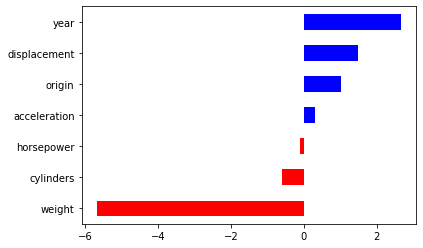

In [56]:
ridge = Ridge(alpha=0.01)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"RMSE: {score}")
report_coef(
  names,
  ridge.coef_,
  ridge.intercept_)

RMSE: 3.460297234027914


,coef,positive
weight,-3.248961,False
horsepower,-0.864198,False
cylinders,-0.780869,False
displacement,-0.333685,False
acceleration,-0.242903,False
origin,1.220070,True
year,2.373585,True


Intercept23.055033557046986


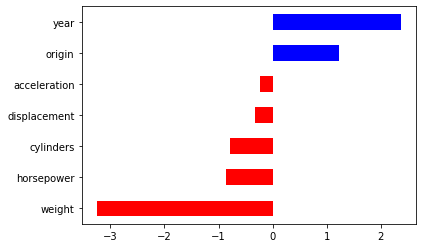

In [59]:
elnet = ElasticNet(alpha=0.1, l1_ratio=0.1)
elnet.fit(x_train, y_train)
pred = elnet.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"RMSE: {score}")
report_coef(
  names,
  elnet.coef_,
  elnet.intercept_)